<a href="https://colab.research.google.com/github/juli-amezquita/recommender-systems/blob/main/An%C3%A1lisis_Exploratorio_Dataset_Empleados_F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sistema recomendador de planes de formación y objetivos de desarrollo empresarial
## Análisis Exploratorio base de datos empleados

In [ ]:
# Se establce conexión con Google Drive para acceder al dataset 
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import re
import string
from unicodedata import normalize
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Carga de datos

In [ ]:
data = pd.read_csv('/content/gdrive/MyDrive/2_Master UNIR/1_Master/6_TFM/0_Bases de datos/clean datasets/1_employee_dataset_new.csv')

In [ ]:
pd.set_option('max_columns', None) 
data.head()

,Unnamed: 0,employee_id,employee_name,area,position,sex,age,antiqueness,marital_status,children,education_level,hobby,succession_plan,succession_plan_skill_1,succession_plan_skill_2,succession_plan_skill_3,performance_measure_skill_1,performance_measure_skill_2,performance_measure_skill_3,position_skill_1,position_skill_2,corporate_skill_1,corporate_skill_2
0,0,10001,Shugo Neat,Presidency,Presidente Ejecutivo,M,56,13,Married,3,Master,Music,No,No,No,No,Customer service,Critical Thinking,Self Confidence,No,No,Corporate Governance,No
1,1,10002,Baron Damphousse,Presidency,Asistente del Presidente Ejecutivo,M,35,9,Divorced,3,Bachelor,Travel,No,No,No,No,Remote Collaboration,Assertive Communication,Remote Collaboration,No,No,No,No
2,2,10003,Marian Neemann,Presidency,Secretaria de Presidencia Ejecutiva,F,46,20,Divorced,2,Master,Yoga,No,No,No,No,Decision Making,Assertive Communication,Problem analysis,No,No,No,No
3,3,10004,Myra Dangelis,Presidency,Secretario de Junta Directiva,F,29,3,Single,0,Master,Reading,No,No,No,No,Remote Collaboration,Conflict Management,Critical Thinking,No,No,No,No
4,4,10005,Kiyohiko Rupel,Presidency,Jefe de Asuntos Corporativos,M,51,20,Single,0,Master,Jogging,No,No,No,No,Critical Thinking,Communication Skills,Customer service,No,No,Corporate Governance,No


In [ ]:
data.shape

(5100, 23)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5100 entries, 0 to 5099
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Unnamed: 0                   5100 non-null   int64 
 1   employee_id                  5100 non-null   int64 
 2   employee_name                5100 non-null   object
 3   area                         5100 non-null   object
 4   position                     5100 non-null   object
 5   sex                          5100 non-null   object
 6   age                          5100 non-null   int64 
 7   antiqueness                  5100 non-null   int64 
 8   marital_status               5100 non-null   object
 9   children                     5100 non-null   int64 
 10  education_level              5100 non-null   object
 11  hobby                        5100 non-null   object
 12  succession_plan              5100 non-null   object
 13  succession_plan_skill_1      5100

# Información General

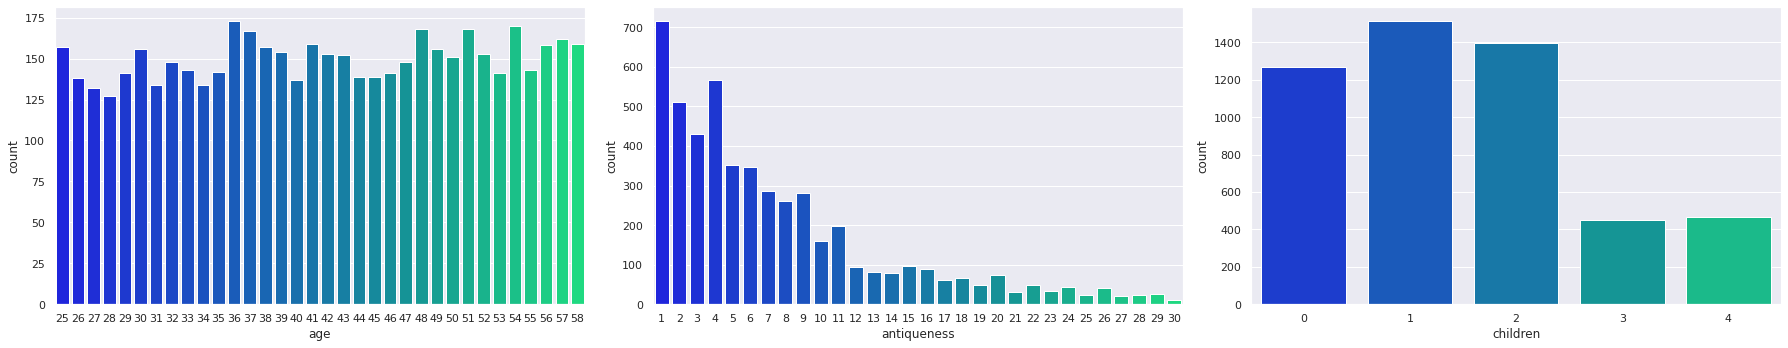

In [ ]:
sns.set()
fig, ax= plt.subplots(nrows=1, ncols=3, figsize=(25, 5))

sns.countplot(ax=ax[0], data = data, x= "age", palette="winter")

sns.countplot(ax=ax[1], data = data, x= "antiqueness", palette="winter")

sns.countplot(ax=ax[2], data = data, x= "children", palette="winter")

plt.savefig("g1.jpg", bbox_inches='tight')

plt.tight_layout()
plt.show()

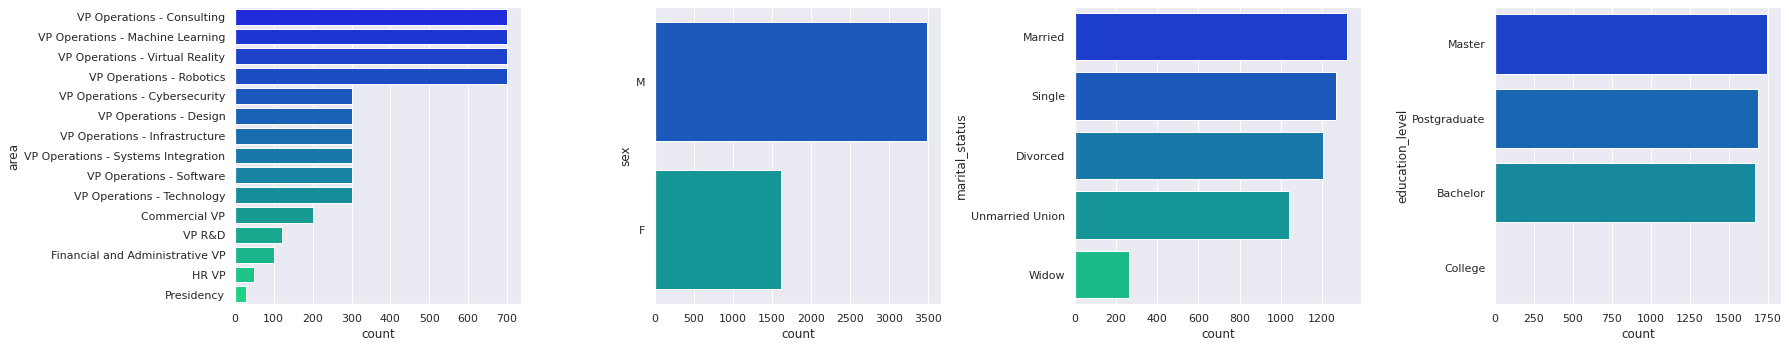

In [ ]:
sns.set()
fig, ax= plt.subplots(nrows=1, ncols=4, figsize=(25, 5))

sns.countplot(ax=ax[0], data = data, y= "area", order = data["area"].value_counts().index, palette="winter")

sns.countplot(ax=ax[1], data = data, y= "sex", order = data["sex"].value_counts().index, palette="winter")

sns.countplot(ax=ax[2], data = data, y= "marital_status", order = data["marital_status"].value_counts().index, palette="winter")

sns.countplot(ax=ax[3], data = data, y= "education_level", order = data["education_level"].value_counts().index, palette="winter")

plt.tight_layout()

fig = plt.gcf()
plt.show()
fig.savefig('a.png')

# Necesidades de formación según Plan de Sucesión 




Revisamos cuántos empleados están dentro del plan de sucesión

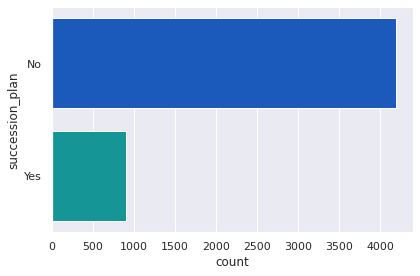

In [ ]:
sns.set()

sns.countplot(data = data, y= "succession_plan", order = data["succession_plan"].value_counts().index, palette="winter")

plt.tight_layout()

fig = plt.gcf()
plt.show()
fig.savefig('g.png')

In [ ]:
# Filtramos todos los empleados que no tienen ninguna competencia a trabajar para esta categoría
sp1= data[(data["succession_plan_skill_1"]!='No')]
sp2= data[(data["succession_plan_skill_2"]!='No')]
sp3= data[(data["succession_plan_skill_3"]!='No')]

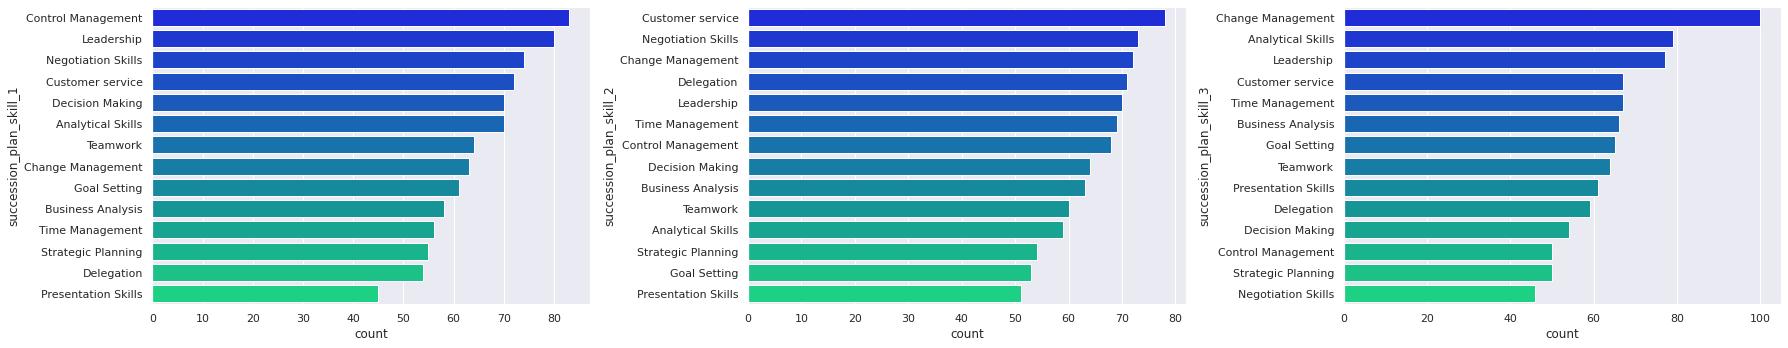

In [ ]:
# succession_plan_skills
sns.set()
fig, ax= plt.subplots(nrows=1, ncols=3, figsize=(25, 5))

sns.countplot(ax=ax[0], data = sp1, y= "succession_plan_skill_1" , order = sp1["succession_plan_skill_1"].value_counts().index, palette="winter")

sns.countplot(ax=ax[1], data = sp2, y= "succession_plan_skill_2", order = sp2["succession_plan_skill_2"].value_counts().index, palette="winter")

sns.countplot(ax=ax[2], data = sp3, y= "succession_plan_skill_3", order = sp3["succession_plan_skill_3"].value_counts().index, palette="winter")

plt.tight_layout()

fig = plt.gcf()
plt.show()
fig.savefig('b.png')

In [ ]:
print(sp1.succession_plan_skill_1.value_counts().sum())
print('*************')
print(sp2.succession_plan_skill_2.value_counts().sum())
print('*************')
print(sp3.succession_plan_skill_3.value_counts().sum())

905
*************
905
*************
905


# Necesidades de formación según Evaluación de Desempeño

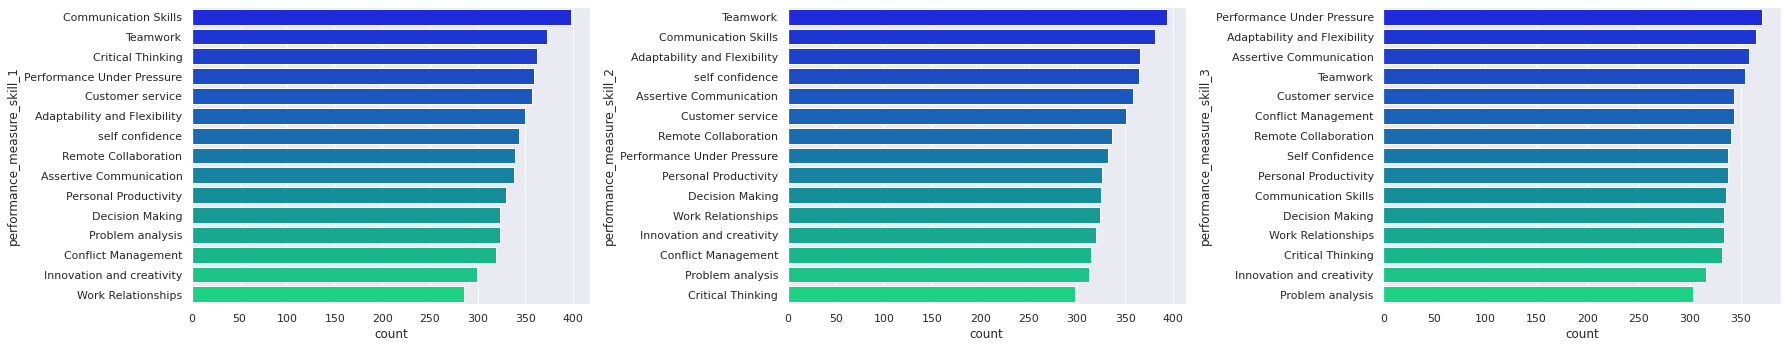

In [ ]:
# performance_measure_skils

sns.set()
fig, ax= plt.subplots(nrows=1, ncols=3, figsize=(25, 5))

sns.countplot(ax=ax[0], data = data, y= "performance_measure_skill_1", order = data["performance_measure_skill_1"].value_counts().index, palette="winter")

sns.countplot(ax=ax[1], data = data, y= "performance_measure_skill_2", order = data["performance_measure_skill_2"].value_counts().index, palette="winter")

sns.countplot(ax=ax[2], data = data, y= "performance_measure_skill_3", order = data["performance_measure_skill_3"].value_counts().index, palette="winter")

plt.tight_layout()

fig = plt.gcf()
plt.show()
fig.savefig('c.png')

In [ ]:
print(data.performance_measure_skill_1.value_counts().sum())
print('*************')
print(data.performance_measure_skill_2.value_counts().sum())
print('*************')
print(data.performance_measure_skill_3.value_counts().sum())

5100
*************
5100
*************
5100


# Necesidades de formación según Posición / Cargo

In [ ]:
# Filtramos todos los empleados que no tienen ninguna competencia a trabajar para esta categoría
ec1= data[(data["position_skill_1"]!='No')]
ec2= data[(data["position_skill_2"]!='No')]

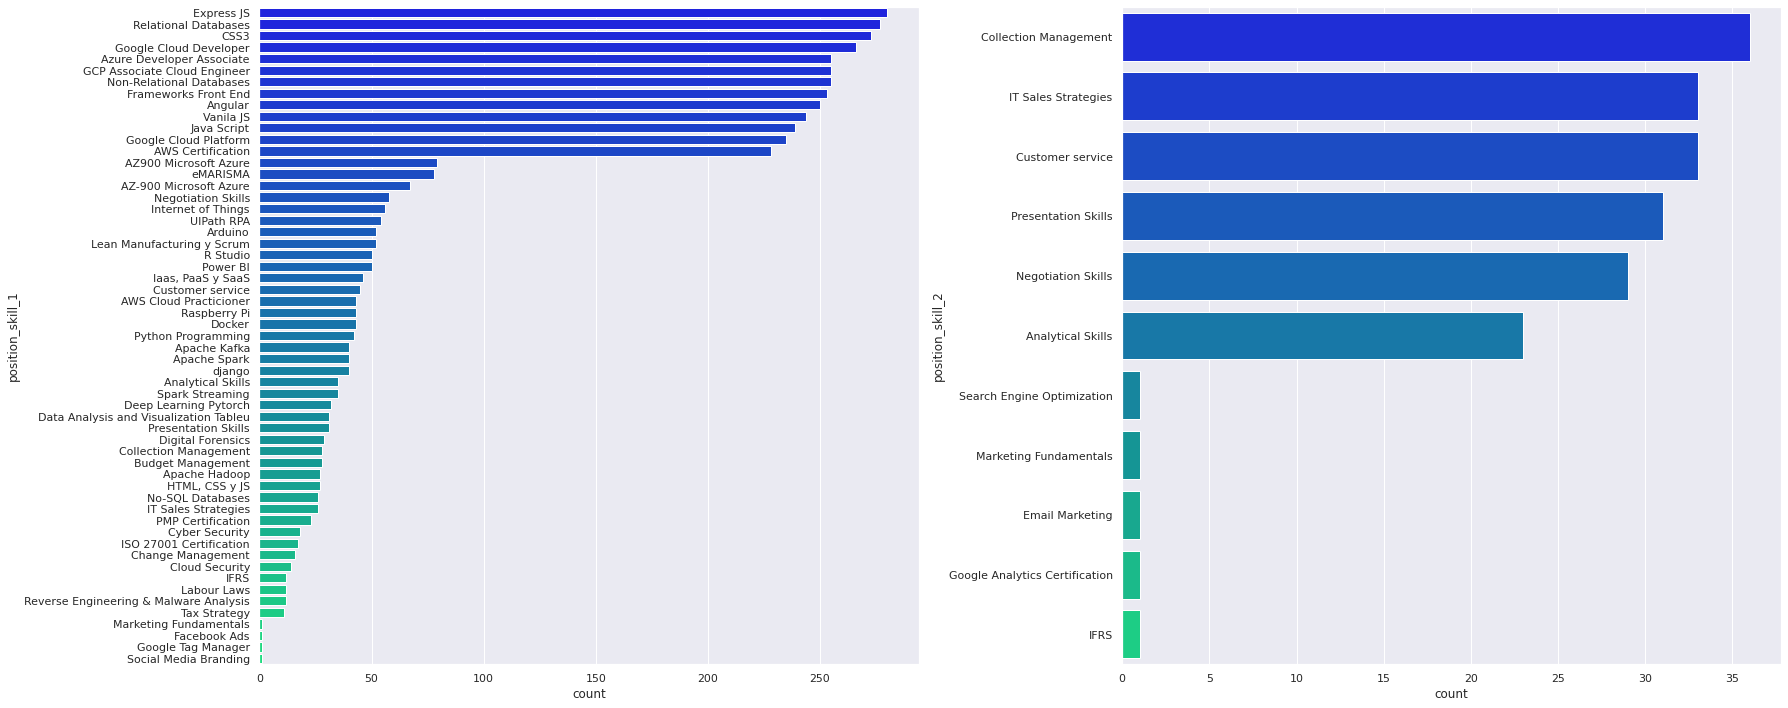

In [ ]:
# position_skills
sns.set()
fig, ax= plt.subplots(nrows=1, ncols=2, figsize=(25, 10))

sns.countplot(ax=ax[0], data = ec1, y= "position_skill_1", order = ec1["position_skill_1"].value_counts().index, palette="winter")

sns.countplot(ax=ax[1], data = ec2, y= "position_skill_2", order = ec2["position_skill_2"].value_counts().index, palette="winter")

plt.tight_layout()

fig = plt.gcf()
plt.show()
fig.savefig('d.png')

In [ ]:
print(ec1.position_skill_1.value_counts().sum())
print('*************')
print(ec2.position_skill_2.value_counts().sum())

4782
*************
190


# Necesidades de formación según Plan Estratégico establecido por la Dirección General de la Compañía

In [ ]:
# Filtramos todos los empleados que no tienen ninguna competencia a trabajar para esta categoría
cs1= data[(data["corporate_skill_1"]!='No')]
cs2= data[(data["corporate_skill_2"]!='No')]

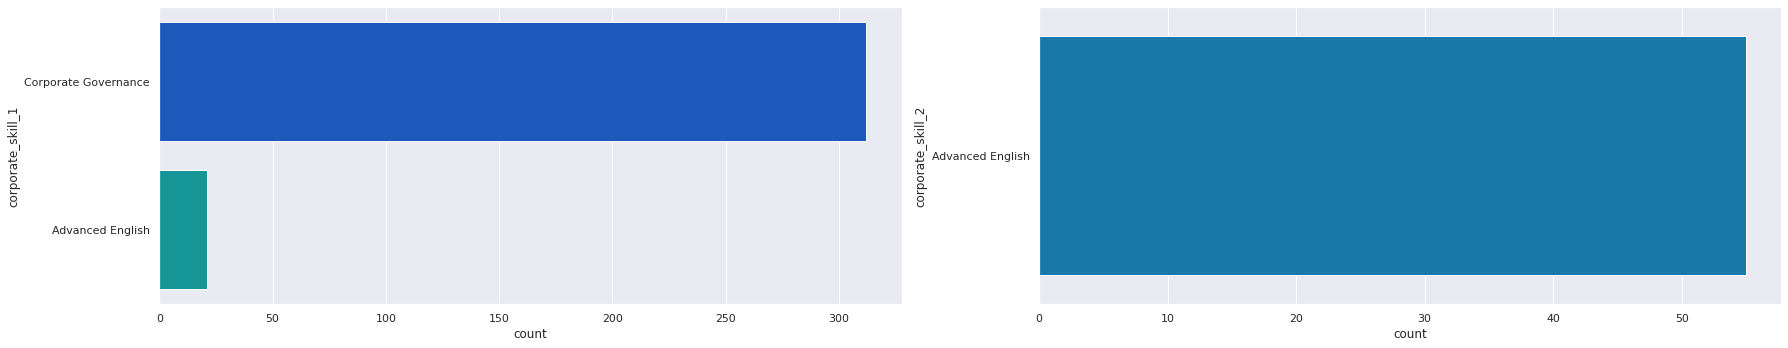

In [ ]:
# corporate_skills

sns.set()
fig, ax= plt.subplots(nrows=1, ncols=2, figsize=(25, 5))

sns.countplot(ax=ax[0], data = cs1, y= "corporate_skill_1", order = cs1["corporate_skill_1"].value_counts().index, palette="winter")

sns.countplot(ax=ax[1], data = cs2, y= "corporate_skill_2", order = cs2["corporate_skill_2"].value_counts().index, palette="winter")

plt.tight_layout()

fig = plt.gcf()
plt.show()
fig.savefig('e.png')

In [ ]:
print(cs1.corporate_skill_1.value_counts().sum())
print('*************')
print(cs2.corporate_skill_2.value_counts().sum())

333
*************
55


# Hobbies

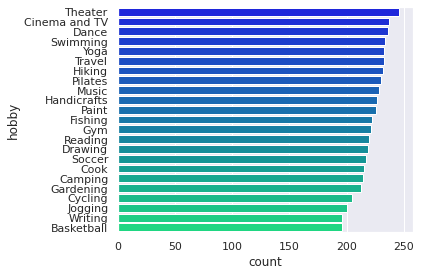

In [ ]:
sns.set()

sns.countplot(data = data, y= "hobby", order = data["hobby"].value_counts().index, palette="winter")

plt.tight_layout()

fig = plt.gcf()
plt.show()
fig.savefig('f.png')